In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline



In [2]:
df= pd.read_excel("C:\\Users\\LENOVO\\Downloads\\Vrinda Store Data Analysis.xlsx ")
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Month,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,44899,Dec,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,44899,Dec,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,44899,Dec,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,44899,Dec,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,44899,Dec,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [3]:
df['Month'].value_counts()

Month
Mar    2819
Feb    2750
Jan    2702
Apr    2685
May    2617
Aug    2617
Jun    2597
Jul    2579
Sep    2490
Oct    2424
Dec    2384
Nov    2383
Name: count, dtype: int64

In [4]:
df.to_csv('Virend Stor Data Analysis.csv')

In [5]:
df['Gender'].value_counts()


Gender
Women    21479
Men       9452
W           74
M           42
Name: count, dtype: int64

In [6]:
df.loc[df['Gender']== 'M', 'Gender']= 'Men'
df.loc[df['Gender']== 'W', 'Gender']= 'Women'


In [7]:
df['Gender'].value_counts()

Gender
Women    21553
Men       9494
Name: count, dtype: int64

In [8]:
df.loc[df['Qty']== 'One', 'Qty']= 1
df.loc[df['Qty']== 'Two', 'Qty']= 2

In [9]:
df['Qty'].value_counts()



Qty
1    30891
2      130
3       19
4        6
5        1
Name: count, dtype: int64

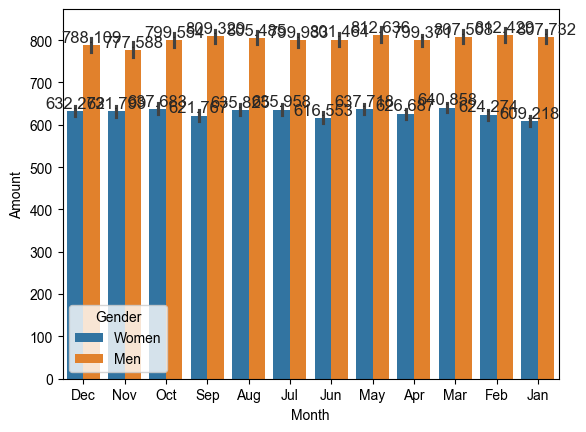

In [10]:

 ax= sns.barplot(data=df, x='Month', y='Amount', hue='Gender')
sns.set(rc={'figure.figsize': (25, 10)})
for bars in ax.containers:
     ax.bar_label(bars)



<Axes: xlabel='Month', ylabel='Amount'>

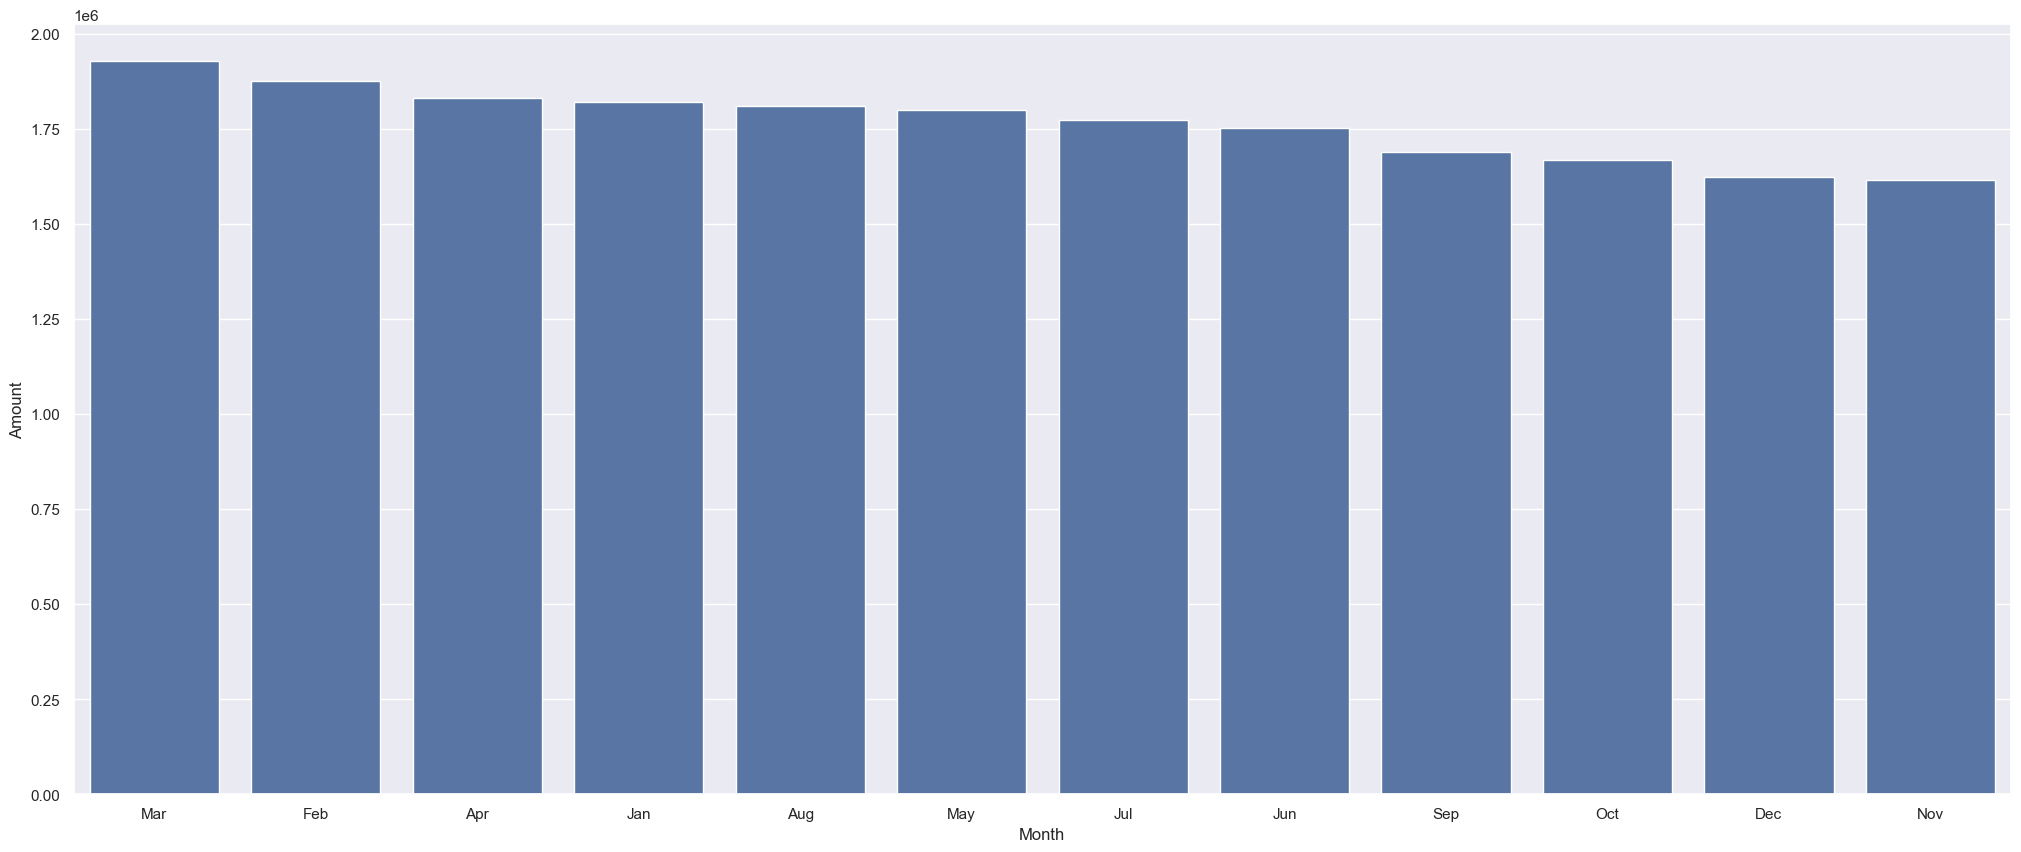

In [11]:

#plt.figure(figsize= (25,10))
sales_for_month_base= df.groupby(['Month'], as_index= False).sum().sort_values(['Amount'], ascending= False)
sns.barplot(x= 'Month', y= 'Amount', data= sales_for_month_base)

#yaha hame patha challa k kis month me zyada harcha kia hia 





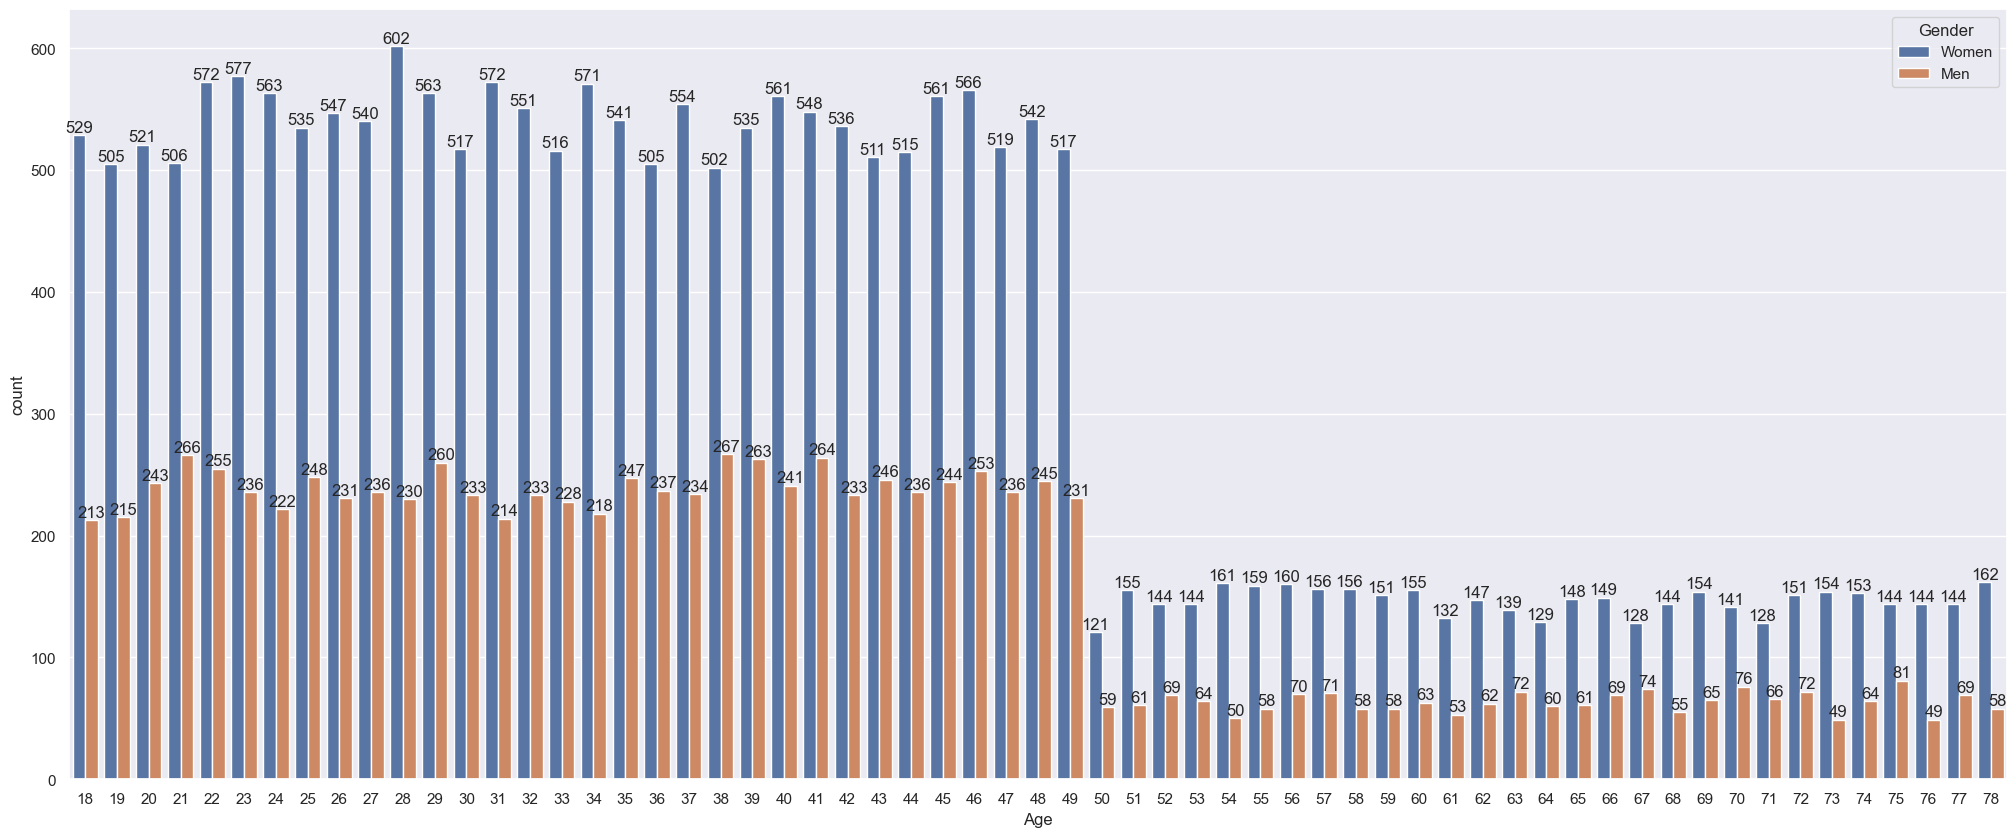

In [12]:
# yaha hum deki ge k men and women me kis  sub se zyada harcha kia hai

mVw= sns.countplot(data= df, x= 'Age', hue= 'Gender')
sns.set(rc={'figure.figsize': (30,10)})
for bars in mVw.containers:
    mVw.bar_label(bars)


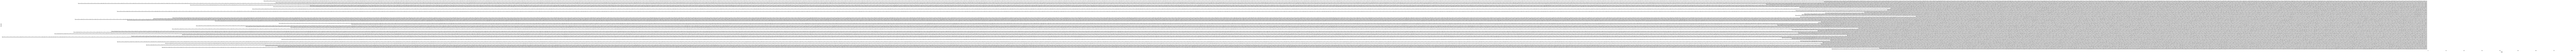

In [12]:
Age_gerder_sales= df.groupby(['Age'], as_index= False)['Gender'].sum().sort_values(by='Gender', ascending= False)
sns.barplot(data= Age_gerder_sales, x= 'Age', y= 'Gender')
sns.set(rc={'figure.figsize': (35,15)})

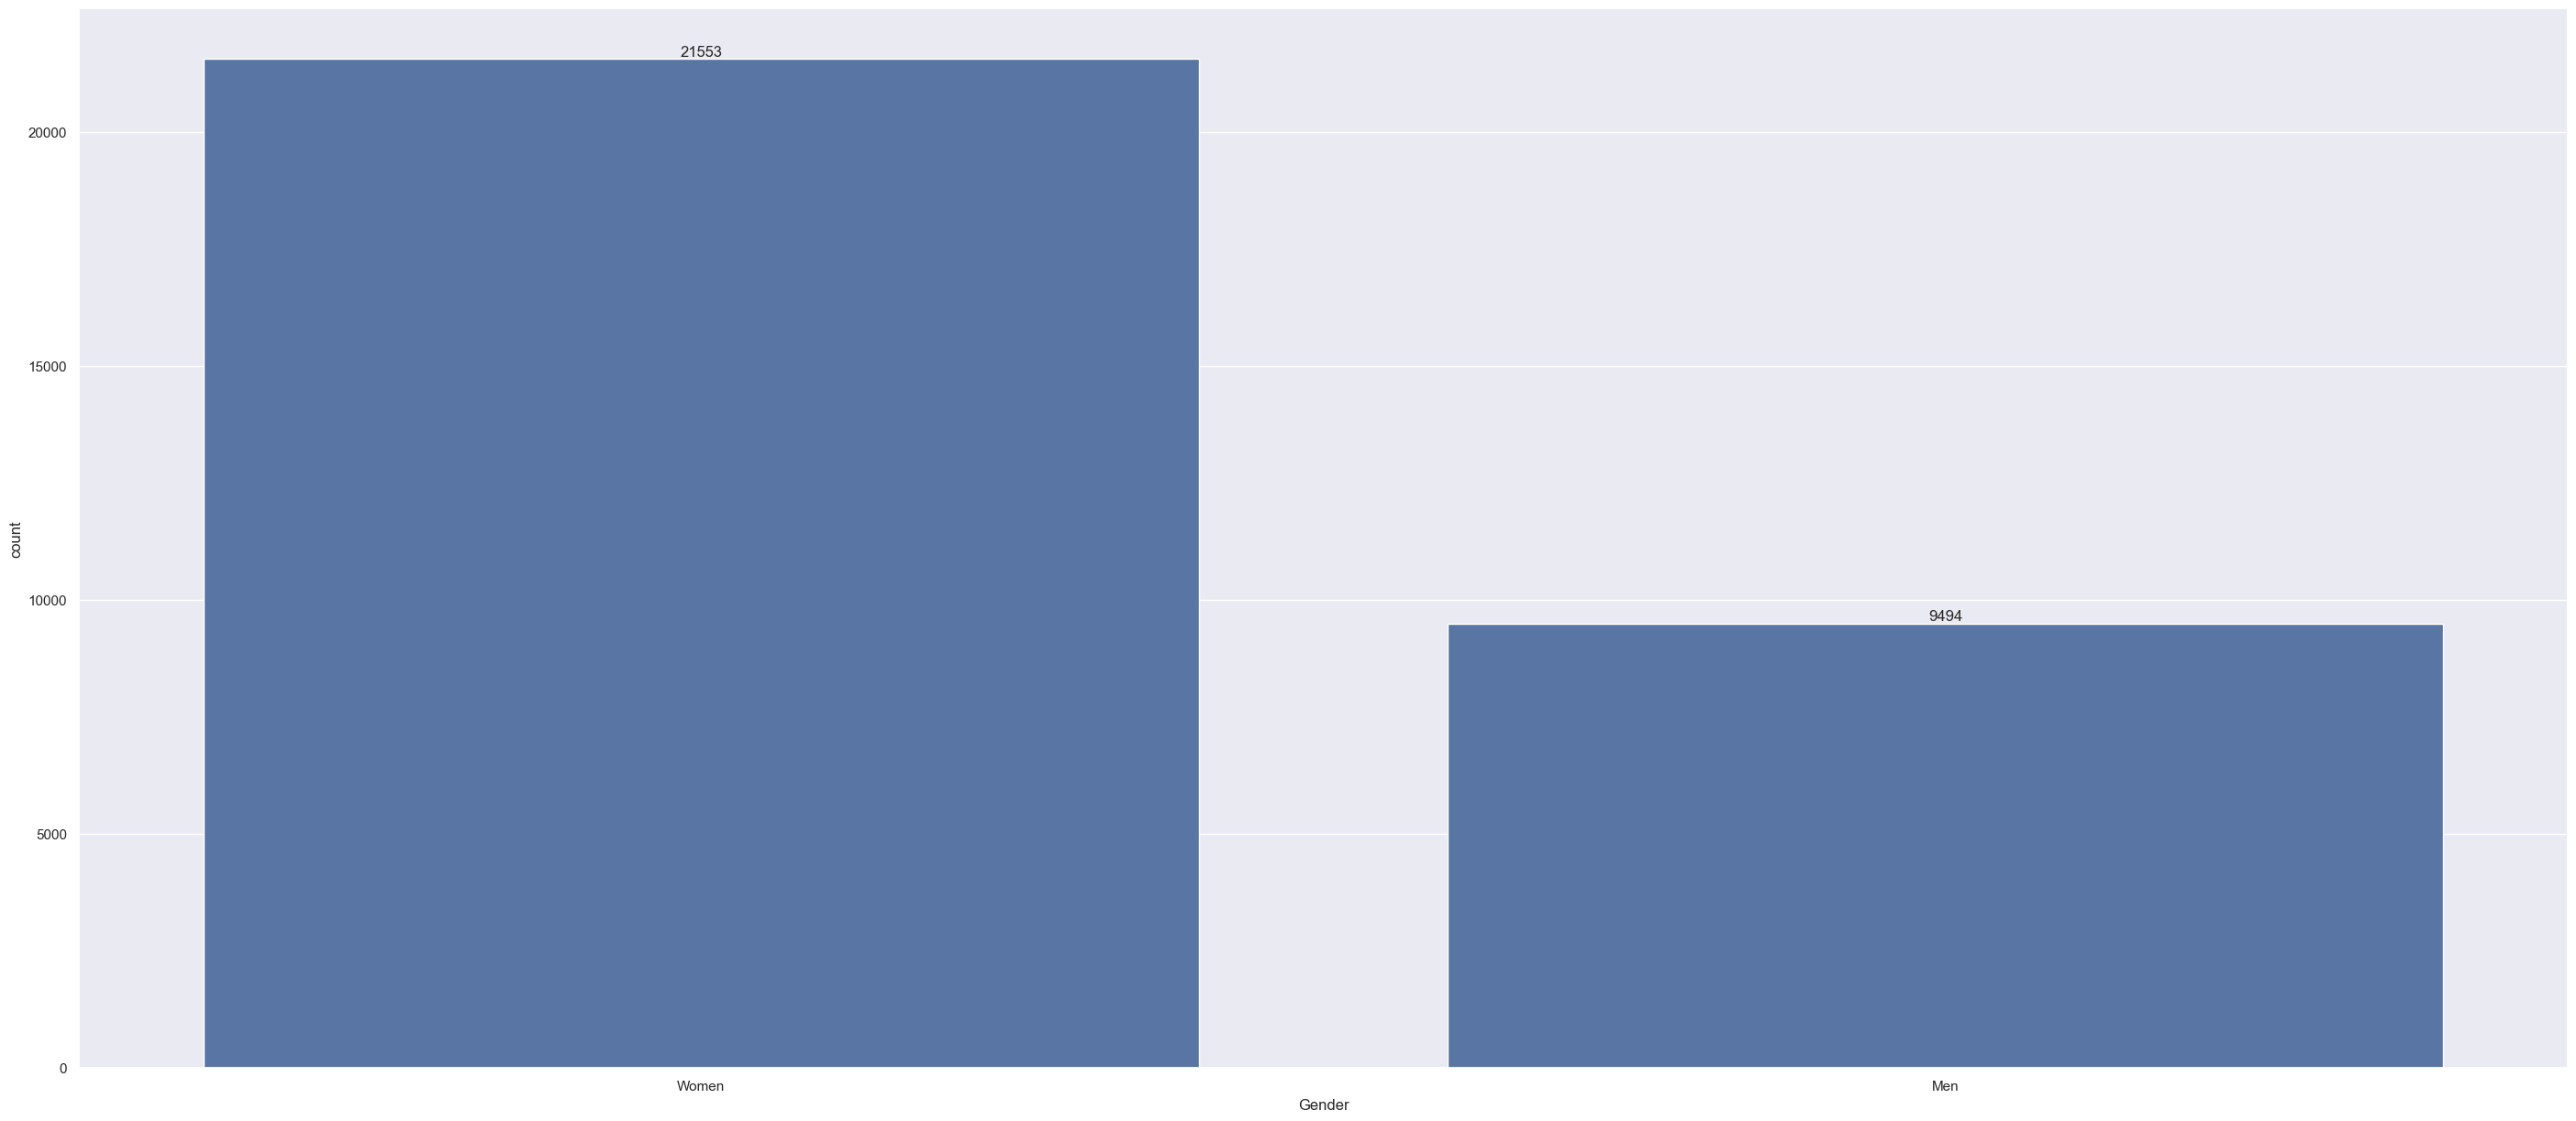

In [13]:
ax= sns.countplot(x= 'Gender', data= df)
for bars in ax.containers:
    ax.bar_label(bars) 
    sns.set(rc={'figure.figsize': (10,5)})

In [15]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Month',
       'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

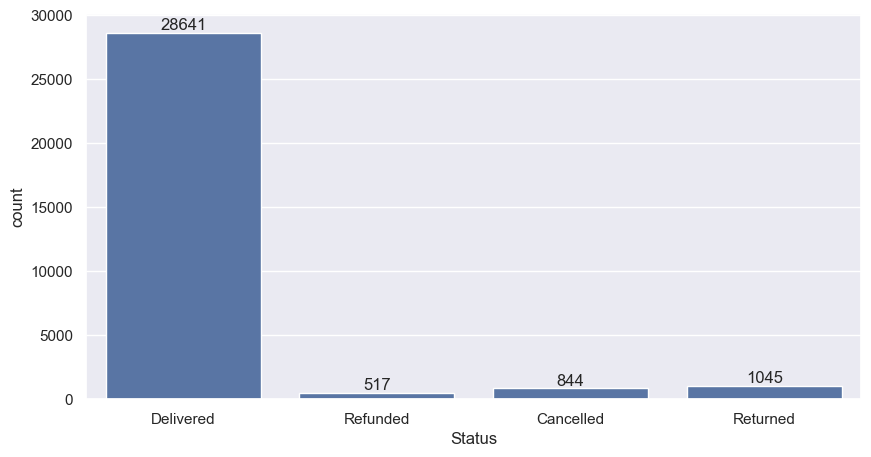

In [14]:
# order status chack karni ka tareka 
Order_status=sns.countplot(data= df, x= 'Status')
sns.set(rc={'figure.figsize': (10,6)})
for bars in Order_status.containers:
    Order_status.bar_label(bars) 

<Axes: xlabel='ship-state', ylabel='Amount'>

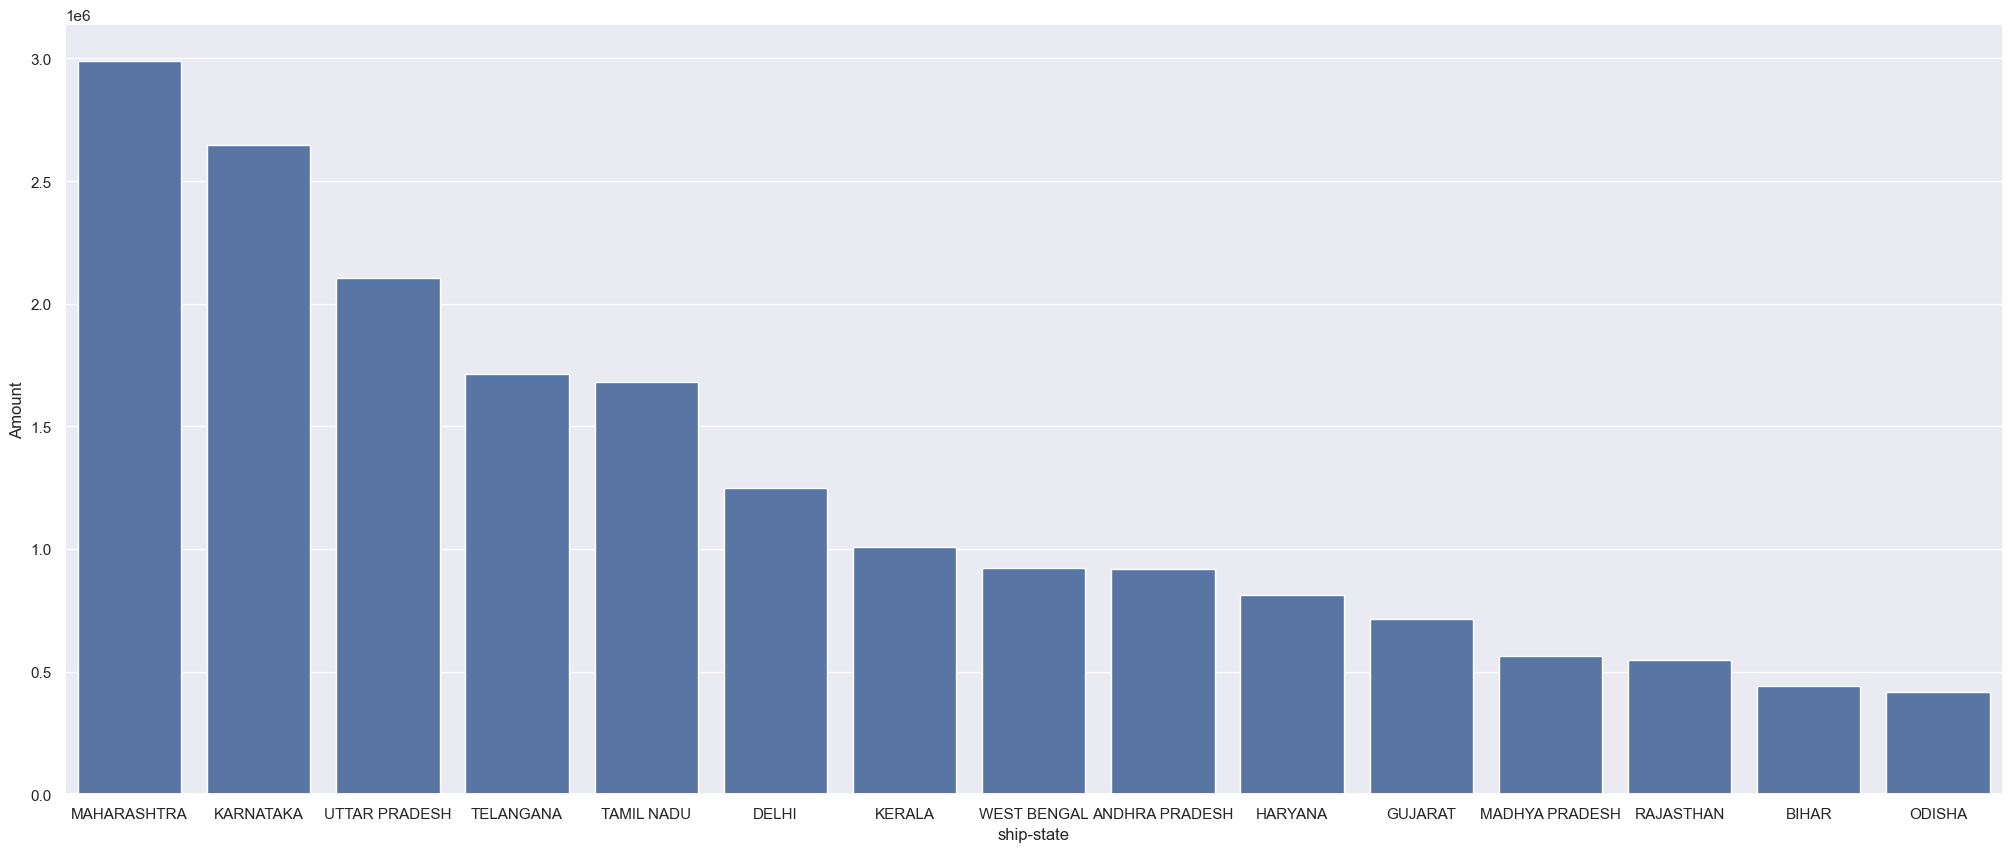

In [19]:
state_sales= df.groupby(['ship-state'] , as_index= False)['Amount'].sum().sort_values(['Amount'] , ascending= False).head(15)
sns.set(rc={'figure.figsize': (25,10)})
sns.barplot(x= 'ship-state', y='Amount', data= state_sales)

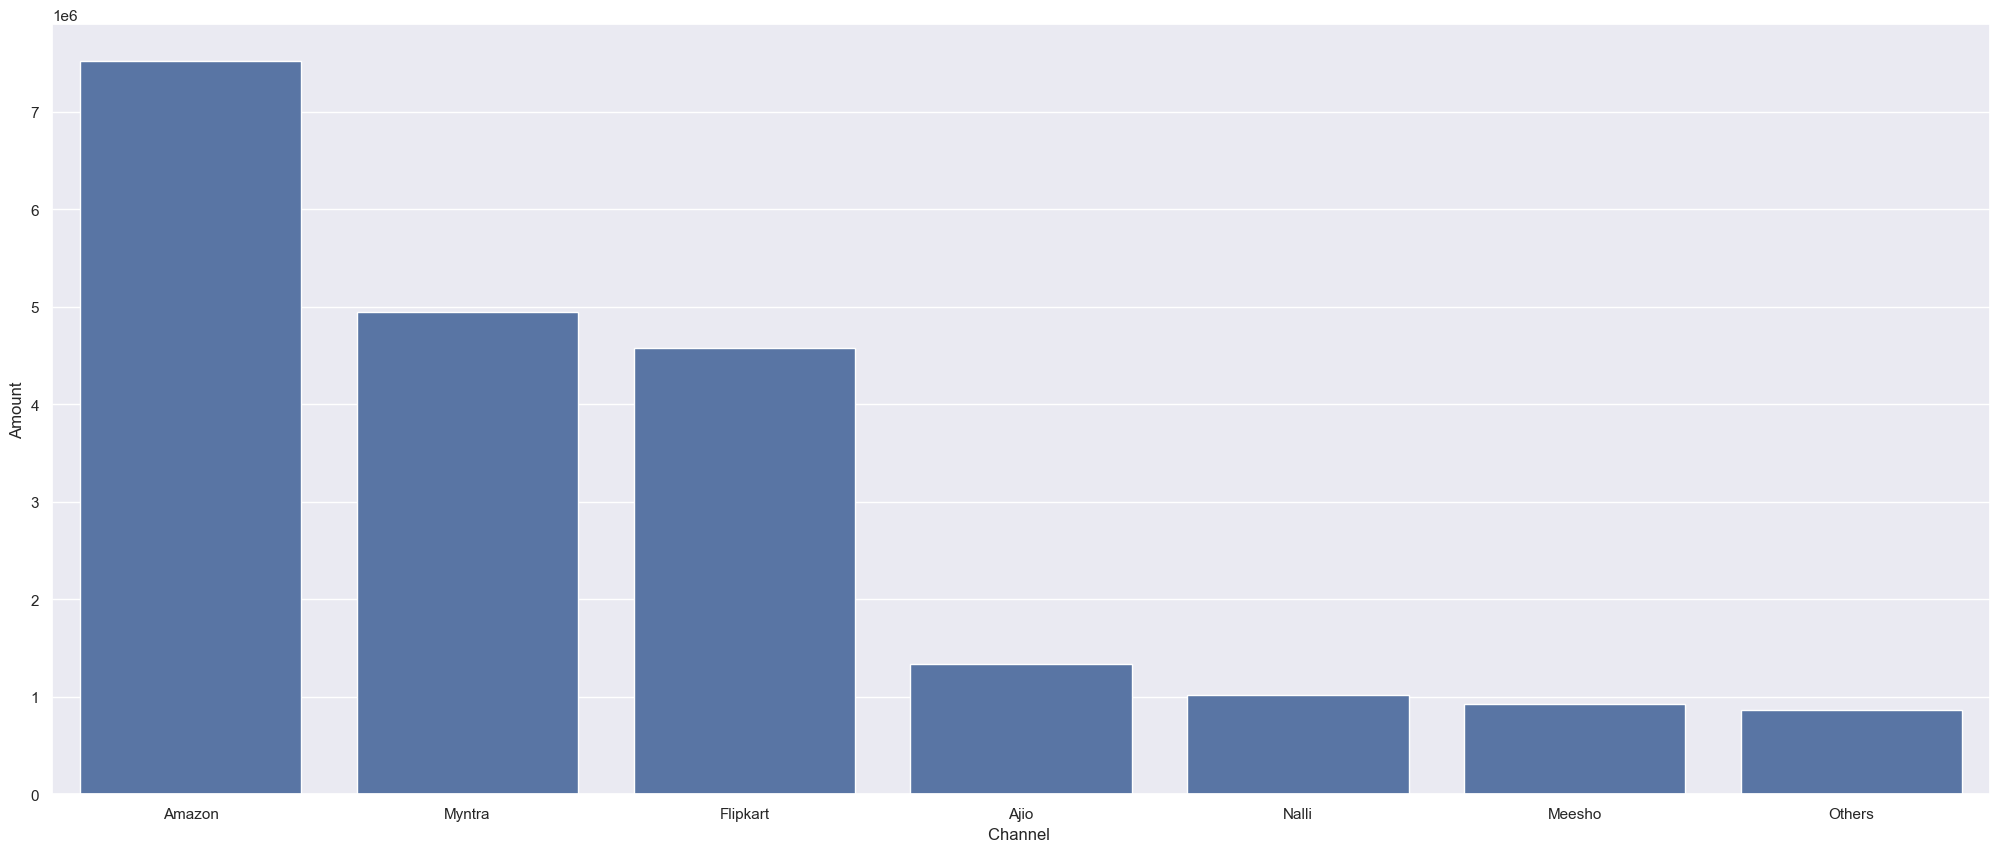

In [20]:
channel_Order= df.groupby(['Channel '], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sns.barplot(data= channel_Order, x=  'Channel ', y= 'Amount')
sns.set(rc={'figure.figsize': (10,6)})

### Men vs. Women Sales:

*Result: Men had significantly higher sales compared to women.

### Monthly Sales:

*Result: May had the highest sales, with women outperforming men.

### Order Status:

*Result:
*Returned: 1,045 orders
*Number 3: 844 orders
*Refunded: 517 orders

### Top 5 States by Sales:

*Result:
*Uttar Pradesh
*Telangana
*Tamil Nadu

### Top 5 Sales Channels:

*Result:
*Amazon
*Myntra
*Flipkart
*Ajio
*Nali

### Age vs. Gender in Orders:

*Result:
*Women: Top purchasing ages are 28, 23, 22, 34, and 46.
*Men: Top purchasing ages are 38, 21, 41, 29, and 22.